In [7]:
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import glob
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [144]:
# accsess the data files and dir
cancer_rays_dir     = os.listdir("IDC_regular_ps50_idx5") 
all_rays_dir        = "all_rays_dir"  # is this path we will put all the images
cancer_rays_dir_str ="IDC_regular_ps50_idx5/"

In [145]:
breast_img = glob.glob('IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [146]:
print(cancer_rays_dir)
print(len(cancer_rays_dir)) 

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

In [ ]:
os.mkdir(all_rays_dir)

In [147]:
all_rays_dir_lst = os.listdir('./all_rays_dir') 

In [148]:
#Here we will move the images, but by adding a small part in their path, which indicates that they are negative or positive
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)
all_rays_dir_lst = os.listdir('./all_rays_dir') 
len(all_rays_dir_lst)

277522

In [229]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

image_id
0  10253_idx5_x1001_y1001_class0.png
1  10253_idx5_x1001_y1051_class0.png
2  10253_idx5_x1001_y1101_class0.png
3  10253_idx5_x1001_y1151_class0.png
4  10253_idx5_x1001_y1201_class0.png

In [230]:
#Based on the addition that we added earlier in the path, we divide the data
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

image_id target
0  10253_idx5_x1001_y1001_class0.png      0
1  10253_idx5_x1001_y1051_class0.png      0
2  10253_idx5_x1001_y1101_class0.png      0
3  10253_idx5_x1001_y1151_class0.png      0
4  10253_idx5_x1001_y1201_class0.png      0
5  10253_idx5_x1001_y1251_class0.png      0
6  10253_idx5_x1001_y1301_class0.png      0
7  10253_idx5_x1001_y1351_class0.png      0
8  10253_idx5_x1001_y1501_class0.png      0
9  10253_idx5_x1001_y1551_class0.png      0

In [243]:
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id
data['patient_id'] = data['image_id'].apply(extract_patient_id)
data.head()

image_id  target patient_id
0  10253_idx5_x1001_y1001_class0.png       0      10253
1  10253_idx5_x1001_y1051_class0.png       0      10253
2  10253_idx5_x1001_y1101_class0.png       0      10253
3  10253_idx5_x1001_y1151_class0.png       0      10253
4  10253_idx5_x1001_y1201_class0.png       0      10253

In [232]:
# 0 is non-IDC and 1 is IDC.
data['target'].value_counts()

0    198737
1     78785
Name: target, dtype: int64

In [233]:
no_cancer_img = []
cancer_img = []

for img in breast_img:
    if img[-5] == '0' :
        no_cancer_img.append(img)
    
    elif img[-5] == '1' :
        cancer_img.append(img)

In [234]:
import plotly.express as px

data_class = pd.DataFrame({'state of cancer': ['0', '1'], 'Numbers of Patients': [198738, 78786]})
color_cycle = px.colors.qualitative.Plotly
bar = px.bar(data_frame=data_class, x='state of cancer', y='Numbers of Patients',
             color='state of cancer', color_discrete_sequence=color_cycle)
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.update_layout(height=400, width=600)  # 调整图表的高度和宽度
bar.show()


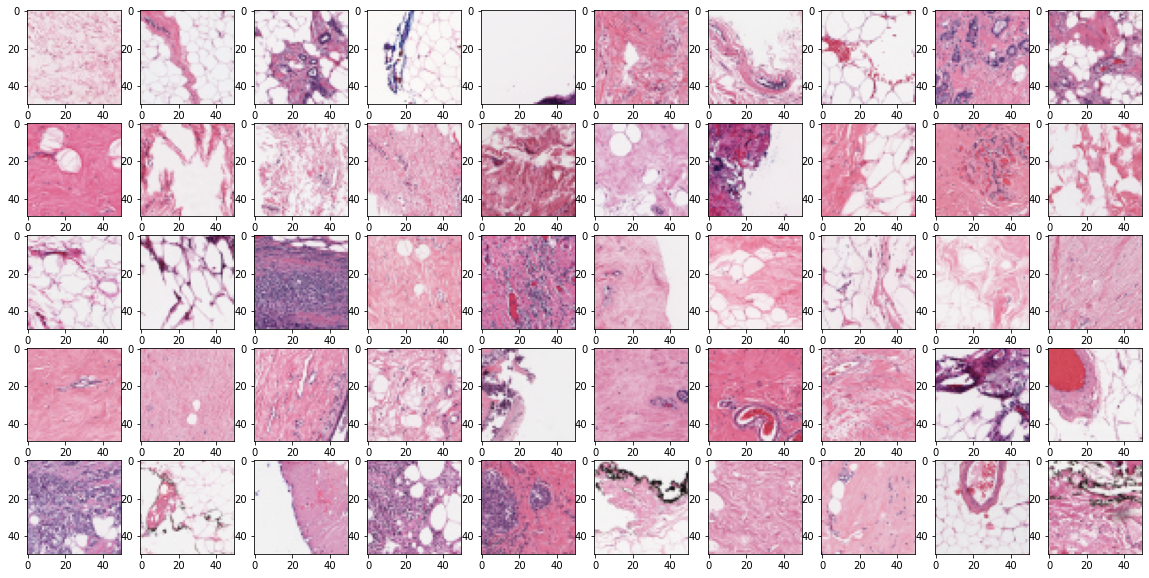

In [235]:
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


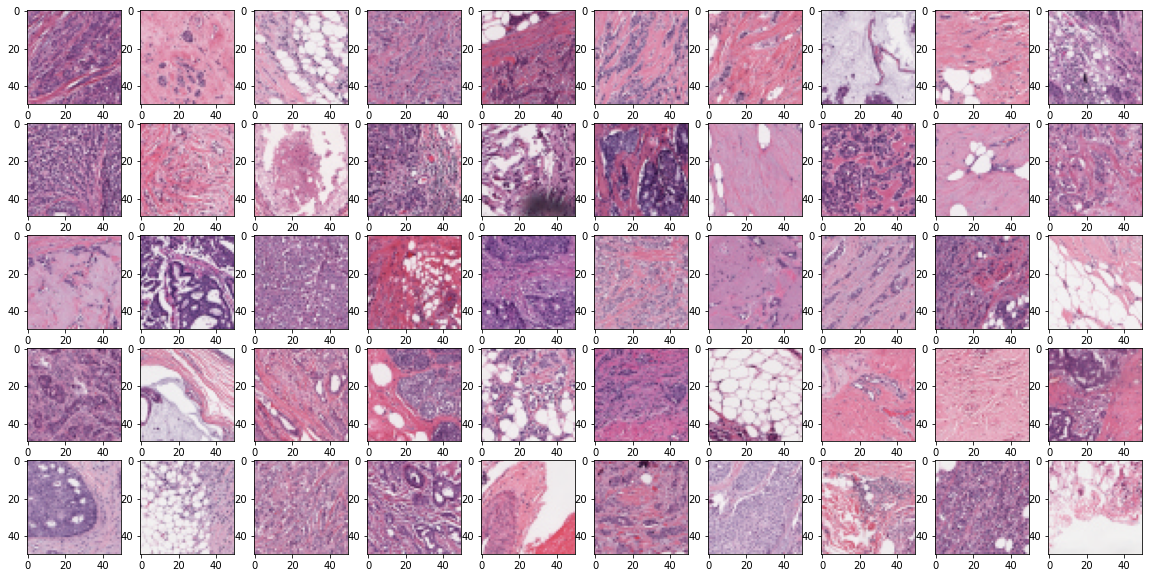

In [236]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

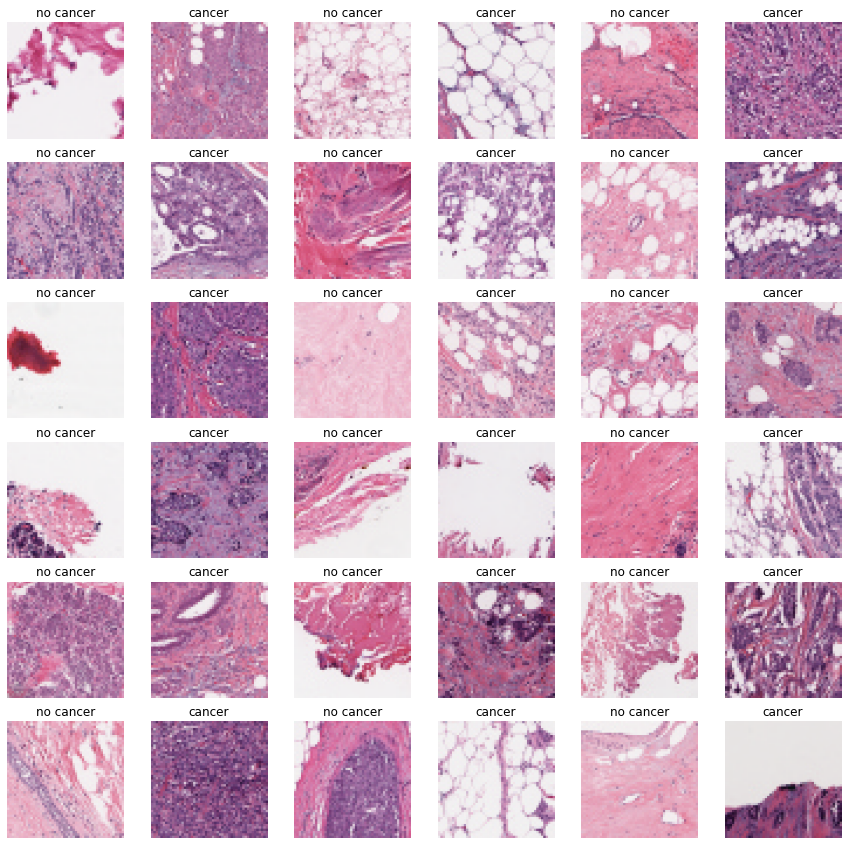

In [239]:
from tensorflow.keras.preprocessing import image
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(no_cancer_img), 18)
some_can = np.random.randint(0, len(cancer_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((no_cancer_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((cancer_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

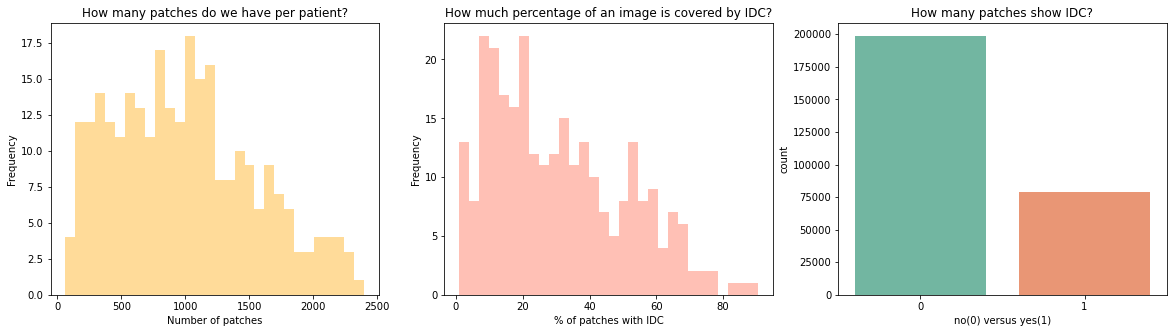

In [240]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

In [241]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = cancer_rays_dir_str + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe
def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

x     y  target                                               path
0  1001  1001       0  IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001...
1  1001  1051       0  IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001...
2  1001  1101       0  IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001...
3  1001  1151       0  IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001...
4  1001  1201       0  IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001...

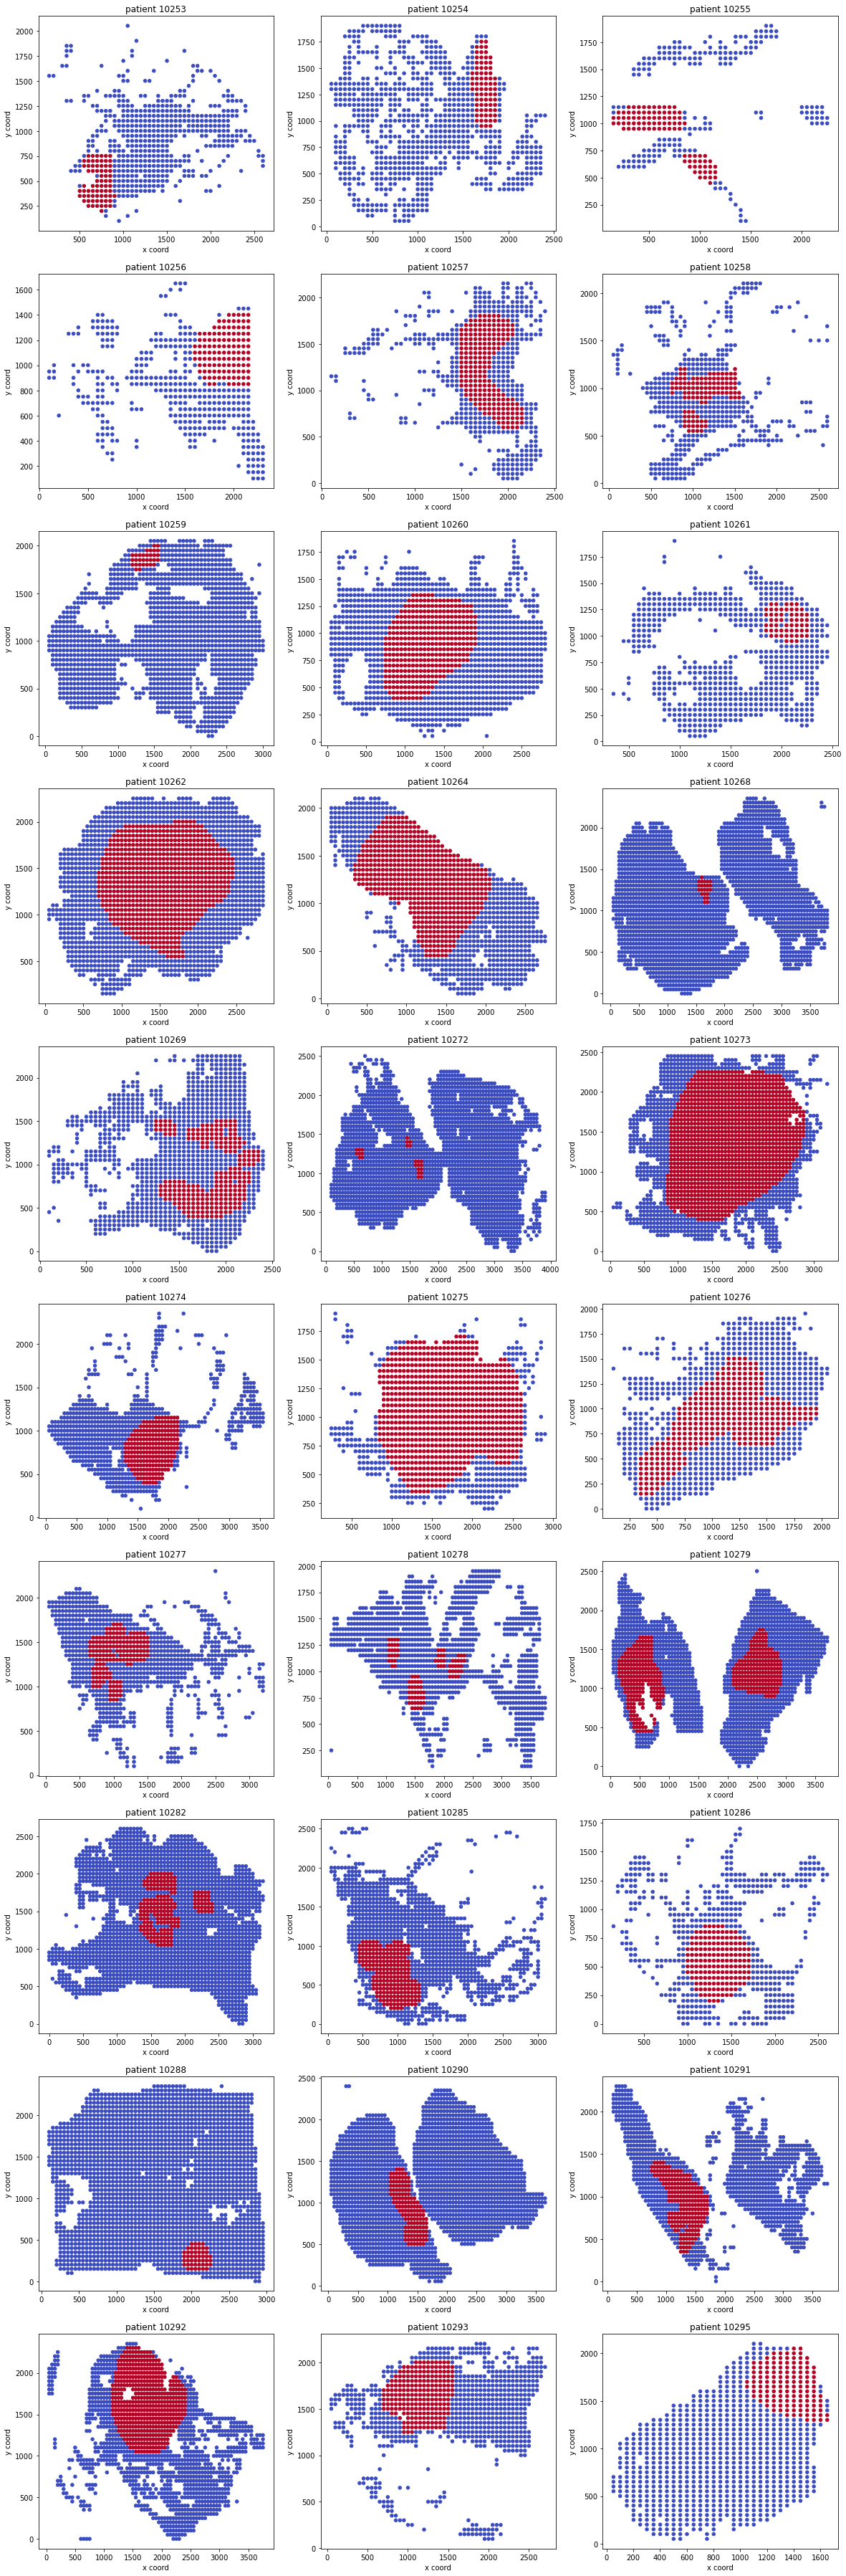

In [244]:
fig, ax = plt.subplots(10,3,figsize=(20, 65))

patient_ids = data.patient_id.unique()

for n in range(10):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("x coord")
        ax[n,m].set_ylabel("y coord")

In [164]:
data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random_image_path[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

In [165]:
data.target = data.target.astype(np.int)
num_images = 5  # 想要输出的图像数量
fig, axes = plt.subplots(1, num_images, figsize=(20, 4))

for i in range(num_images):
    random_image_path = np.random.choice(data[data.target == 0].index, size=1, replace=False)
    image_id = data.loc[random_image_path[0], 'image_id']
    path = os.path.join(all_rays_dir, image_id)
    image = mpimg.imread(path)
    axes[i].imshow(image)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(image_id)  

plt.show()


In [166]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

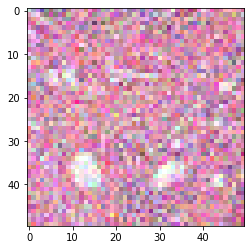

In [167]:
noise_image = random_noise(image)
plt.imshow(noise_image)

In [ ]:
#os.mkdir('histopathology_image_processing') #We create a new file to process the data in
#os.mkdir('histopathology_image_processing/noise_images')

In [172]:
#Here we take the image from the normal images folder, process it, and then save it in the new file
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'/'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('histopathology_image_processing/noise_images',fname)
    mpimg.imsave(new_path, noise_image)
    

In [ ]:
#os.mkdir( 'histopathology_image_processing/processd_data_train')
#os.mkdir( 'histopathology_image_processing/processd_data_test')
#os.mkdir( 'histopathology_image_processing/processd_data_train/0_no_cancer')
#os.mkdir( 'histopathology_image_processing/processd_data_train/1_cancer')
#os.mkdir( 'histopathology_image_processing/processd_data_test/0_no_cancer')
#os.mkdir( 'histopathology_image_processing/processd_data_test/1_cancer')

In [173]:
processd_lst = os.listdir('histopathology_image_processing/noise_images')
processd_lst_str = 'histopathology_image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

image_id
0  10253_idx5_x1001_y1001_class0.png
1  10253_idx5_x1001_y1051_class0.png
2  10253_idx5_x1001_y1101_class0.png
3  10253_idx5_x1001_y1151_class0.png
4  10253_idx5_x1001_y1201_class0.png

In [174]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0  10253_idx5_x1001_y1001_class0.png      0
1  10253_idx5_x1001_y1051_class0.png      0
2  10253_idx5_x1001_y1101_class0.png      0
3  10253_idx5_x1001_y1151_class0.png      0
4  10253_idx5_x1001_y1201_class0.png      0
5  10253_idx5_x1001_y1251_class0.png      0
6  10253_idx5_x1001_y1301_class0.png      0
7  10253_idx5_x1001_y1351_class0.png      0
8  10253_idx5_x1001_y1501_class0.png      0
9  10253_idx5_x1001_y1551_class0.png      0

In [175]:
processd_data['target'].value_counts()

0    198737
1     78785
Name: target, dtype: int64

In [176]:
y = processd_data['target']
processd_train, processd_test = train_test_split(processd_data, test_size=0.10, random_state=101, stratify=y)
processd_test_pls =processd_test.image_id
processd_train_pls =processd_train.image_id

In [177]:
processd_data.set_index('image_id', inplace=True)
for image in processd_test_pls:
    fname = image
    target = processd_data.loc[image,'target']
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("histopathology_image_processing/data_test", label, fname)
    shutil.copyfile(src, dst)

In [178]:
for image in processd_train_pls:
    fname  = image
    target = processd_data.loc[image,'target']
    
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join('histopathology_image_processing/data_train', label, fname)
    shutil.copyfile(src, dst)

In [179]:
print(len(os.listdir('histopathology_image_processing/data_train/0_no_cancer')))
print(len(os.listdir('histopathology_image_processing/data_train/1_cancer')))
print(len(os.listdir('histopathology_image_processing/data_test/0_no_cancer')))
print(len(os.listdir('histopathology_image_processing/data_test/1_cancer')))

178863
70906
19874
7879


In [180]:
processd_lst = os.listdir('histopathology_image_processing/noise_images')
processd_lst_str = 'histopathology_image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0  10253_idx5_x1001_y1001_class0.png      0
1  10253_idx5_x1001_y1051_class0.png      0
2  10253_idx5_x1001_y1101_class0.png      0
3  10253_idx5_x1001_y1151_class0.png      0
4  10253_idx5_x1001_y1201_class0.png      0
5  10253_idx5_x1001_y1251_class0.png      0
6  10253_idx5_x1001_y1301_class0.png      0
7  10253_idx5_x1001_y1351_class0.png      0
8  10253_idx5_x1001_y1501_class0.png      0
9  10253_idx5_x1001_y1551_class0.png      0

In [ ]:
os.mkdir( 'histopathology_image_processing/model_tst')
os.mkdir( 'histopathology_image_processing/model_tst/trainig')
os.mkdir( 'histopathology_image_processing/model_tst/testing')          
os.mkdir( 'histopathology_image_processing/model_tst/trainig/0_no_cancer')
os.mkdir( 'histopathology_image_processing/model_tst/trainig/1_cancer')
os.mkdir( 'histopathology_image_processing/model_tst/testing/0_no_cancer')
os.mkdir( 'histopathology_image_processing/model_tst/testing/1_cancer')

In [181]:
df_0 = processd_data[processd_data['target'] == '0'].sample(10000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('histopathology_image_processing/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('histopathology_image_processing/model_tst/testing', label, fname)
    shutil.copyfile(src, dst) 

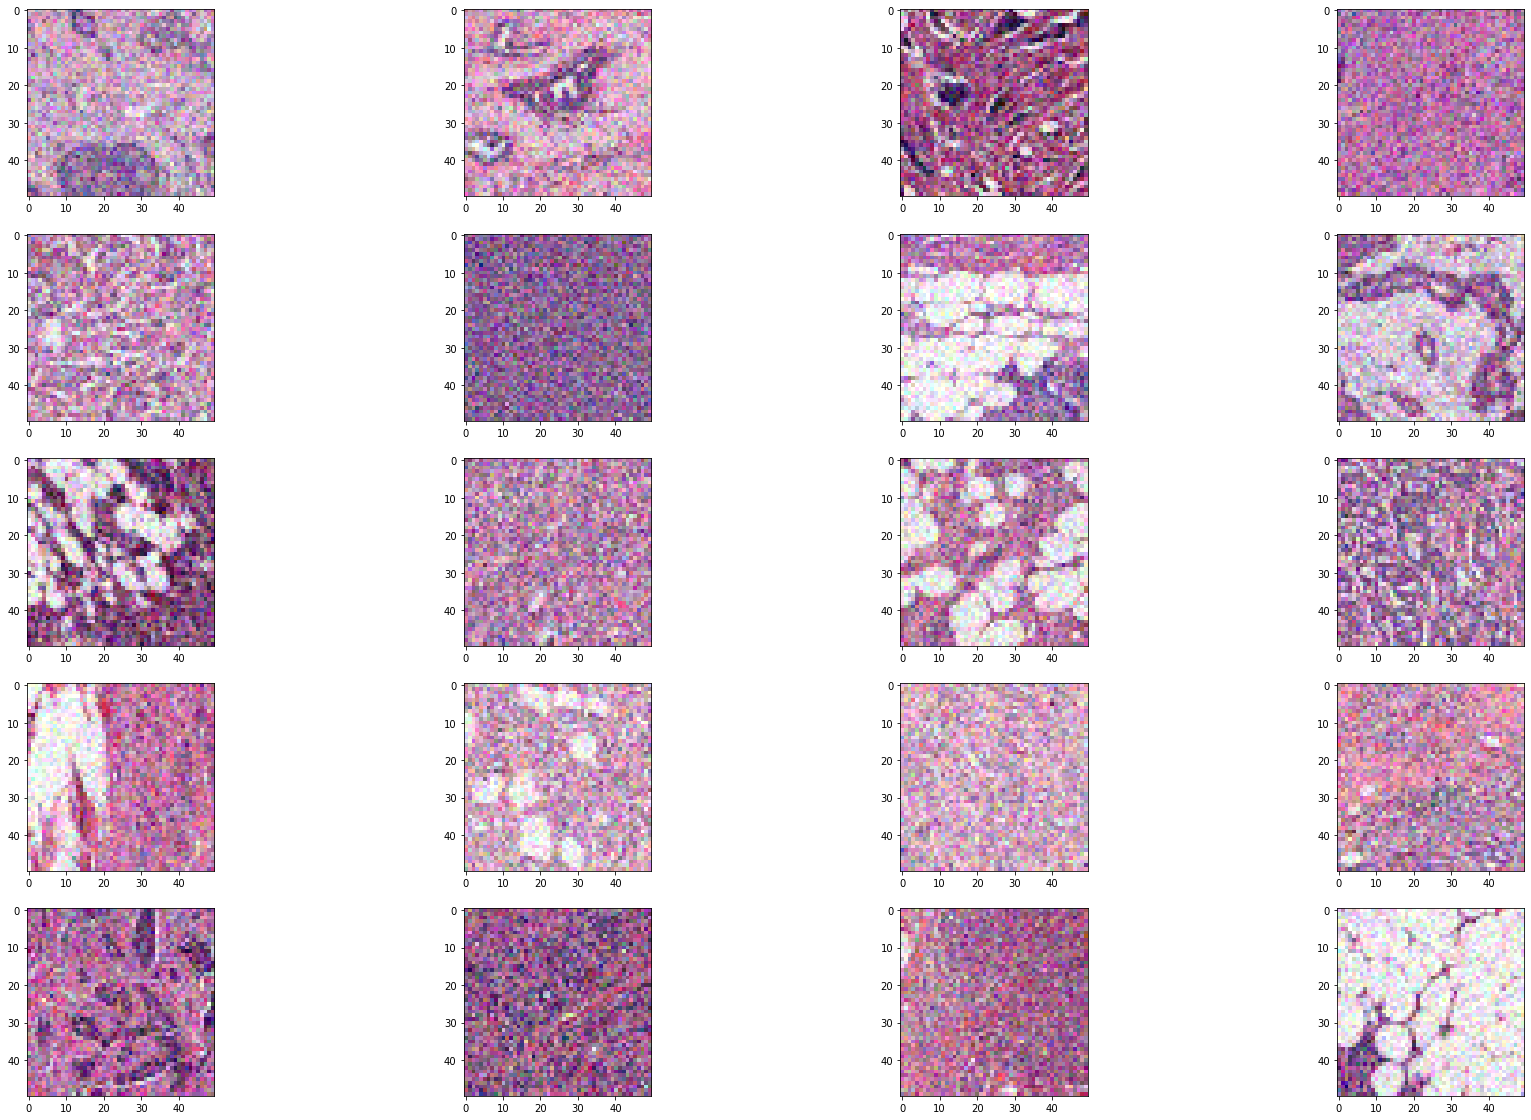

In [182]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [183]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [184]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory(
    "histopathology_image_processing/model_tst/trainig", 
    target_size=(50,50), 
    batch_size=10,
    class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory(
    "histopathology_image_processing/model_tst/testing",
    target_size=(50,50),
    batch_size=10,
    class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [185]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [186]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)
my_model_im_processd.fit_generator(
    train_generation_processd,
    validation_data=test_generation_processd,
    epochs=60, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/60
1800/1800 [==============================] - 97s 53ms/step - loss: 0.6930 - accuracy: 0.5129 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/60
1800/1800 [==============================] - 95s 53ms/step - loss: 0.6933 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/60
1800/1800 [==============================] - 99s 55ms/step - loss: 0.6933 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/60
1800/1800 [==============================] - 95s 53ms/step - loss: 0.6933 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/60
1800/1800 [==============================] - 96s 53ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/60
1800/1800 [==============================] - 96s 53ms/step - loss: 0.6933 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
#os.mkdir( 'histopathology_image_processing/normal')
#os.mkdir( 'histopathology_image_processing/normal/model_tst') 
#os.mkdir( 'histopathology_image_processing/normal/model_tst/trainig')
#os.mkdir( 'histopathology_image_processing/normal/model_tst/testing')
#os.mkdir( 'histopathology_image_processing/normal/model_tst/trainig/0_no_cancer')
#os.mkdir( 'histopathology_image_processing/normal/model_tst/trainig/1_cancer')
#os.mkdir( 'histopathology_image_processing/normal/model_tst/testing/0_no_cancer')
#os.mkdir( 'histopathology_image_processing/normal/model_tst/testing/1_cacner')

In [187]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data['target'] = data['image_id'].apply(extract_target)
df_0 = data[data['target'] == '0'].sample(10000, random_state=101)
df_1 = data[data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('histopathology_image_processing/normal/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('histopathology_image_processing/normal/model_tst/testing', label, fname)
    shutil.copyfile(src, dst)    

In [188]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory(
    "histopathology_image_processing/normal/model_tst/trainig", 
    target_size=(50,50), 
    batch_size=10,
    class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory(
    "histopathology_image_processing/normal/model_tst/testing",
    target_size=(50,50),
    batch_size=10,
    class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [189]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [190]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)
my_model_im_processd.fit_generator(
    train_generation_normal,
    validation_data=test_generation_normal,
    epochs=60, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/60
1800/1800 [==============================] - 111s 61ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/60
1800/1800 [==============================] - 100s 56ms/step - loss: 0.6933 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/60
1800/1800 [==============================] - 98s 55ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/60
1800/1800 [==============================] - 93s 52ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/60
1800/1800 [==============================] - 96s 53ms/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/60
1800/1800 [==============================] - 92s 51ms/step - loss: 0.6933 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/60
1800/1800 [==============================] - 99s 55ms/step - loss: 0.6930 - accuracy: 0.5064 - val_loss: 0.6935

In [191]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head()

image_id target
0  10253_idx5_x1001_y1001_class0.png      0
1  10253_idx5_x1001_y1051_class0.png      0
2  10253_idx5_x1001_y1101_class0.png      0
3  10253_idx5_x1001_y1151_class0.png      0
4  10253_idx5_x1001_y1201_class0.png      0

In [192]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [193]:
print(data_train.shape)
print(data_test.shape)

(249769, 2)
(27753, 2)


In [ ]:
#os.mkdir( 'data_train_dir')
#os.mkdir('data_test_dir')
#os.mkdir( 'data_train_dir/0_no_cancer')
#os.mkdir( 'data_train_dir/1_cancer')
#os.mkdir( 'data_test_dir/0_no_cancer')
#os.mkdir( 'data_test_dir/1_cancer')

In [194]:
train = data_train.image_id
test  = data_test.image_id

In [195]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('data_train_dir', label, fname)
    shutil.copyfile(src, dst)

In [196]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = '0_no_cancer'
    if target == '1':
        label = '1_cancer'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("data_test_dir", label, fname)
    shutil.copyfile(src, dst)

In [197]:
print('non-cancer(IDC) train      =',len(os.listdir('data_train_dir/0_no_cancer')))
print('cancer(IDC) train          =',len(os.listdir('data_train_dir/1_cancer')))
print('non-cancer(IDC) validation =',len(os.listdir('data_test_dir/0_no_cancer')))
print('cancer(IDC) validation     =',len(os.listdir('data_test_dir/1_cancer')))

non-cancer(IDC) train      = 178863
cancer(IDC) train          = 70906
non-cancer(IDC) validation = 19874
cancer(IDC) validation     = 7879


In [198]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [199]:
train_generation = data_generation.flow_from_directory(
                                        "data_train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "data_test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')

Found 249769 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


In [200]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))
my_model.add(Dropout(.3))

my_model.add(Flatten())

my_model.add(Dense(256,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 22, 32)        1568      
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 2592)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               663808    
                                                      

In [201]:
training_history = my_model.fit_generator(
    train_generation,
    validation_data=test_generation,
    epochs=60, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/60
24977/24977 [==============================] - 968s 39ms/step - loss: 0.4203 - accuracy: 0.8186 - val_loss: 0.3858 - val_accuracy: 0.8332
Epoch 2/60
24977/24977 [==============================] - 1016s 41ms/step - loss: 0.3908 - accuracy: 0.8326 - val_loss: 0.3846 - val_accuracy: 0.8369
Epoch 3/60
24977/24977 [==============================] - 991s 40ms/step - loss: 0.3789 - accuracy: 0.8390 - val_loss: 0.3587 - val_accuracy: 0.8475
Epoch 4/60
24977/24977 [==============================] - 902s 36ms/step - loss: 0.3732 - accuracy: 0.8423 - val_loss: 0.4207 - val_accuracy: 0.8313
Epoch 5/60
24977/24977 [==============================] - 881s 35ms/step - loss: 0.3678 - accuracy: 0.8448 - val_loss: 0.3511 - val_accuracy: 0.8496
Epoch 6/60
24977/24977 [==============================] - 904s 36ms/step - loss: 0.3646 - accuracy: 0.8466 - val_loss: 0.3518 - val_accuracy: 0.8505
Epoch 7/60
24977/24977 [==============================] - 894s 36ms/step - loss: 0.3629 - accuracy: 0.847

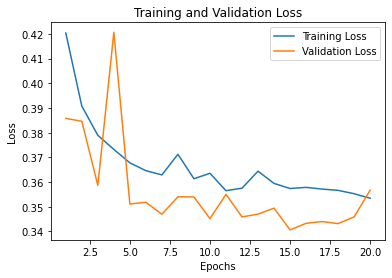

In [202]:
import pickle

with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

train_accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [203]:
val_loss, val_acc = \
my_model.evaluate_generator(test_generation)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.35671669244766235
val_acc: 0.8507548570632935


In [204]:
model_json = my_model.to_json()

In [205]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)
my_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [206]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


In [209]:
class Api_service :
    def __init__(self,img_file_path):
        self.img_file_path = img_file_path
    def prediction_function(self) :
        predict_generation = data_generation.flow_from_directory(
                                            self.img_file_path,
                                            target_size=(25,25),
                                            batch_size=10,
                                            class_mode='categorical')

        prediction = loaded_model.predict_generator(predict_generation)
        has_cancer = 'The percentage of cancer : '+ str(round(prediction[0][0]*100,2)) + "%"
        has_no_cancer='Percentage of no cancer : ' + str(round(prediction[0][1]*100,2)) + '%'
        return has_cancer,has_no_cancer 
prediction = Api_service("histopathology_image_processing/normal/model_tst/trainig")
x,y        = prediction.prediction_function()
print(x)
print(y)

Found 18000 images belonging to 2 classes.
The percentage of cancer : 94.85%
Percentage of no cancer : 5.15%


Found 18000 images belonging to 2 classes.


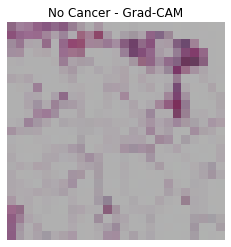

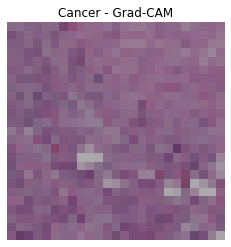

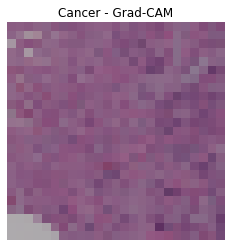

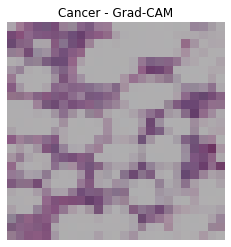

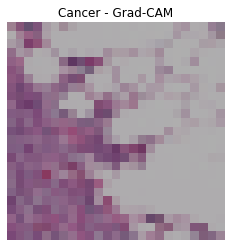

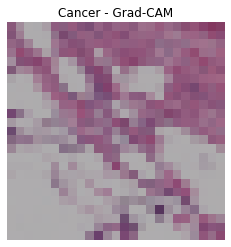

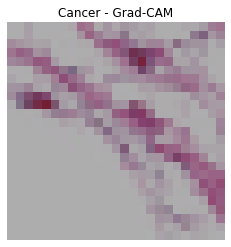

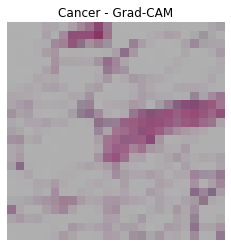

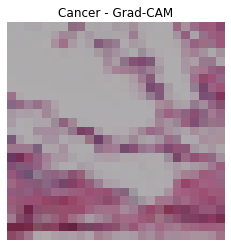

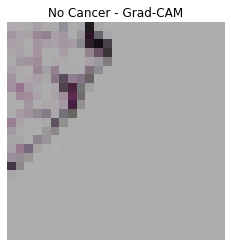

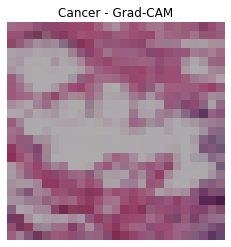

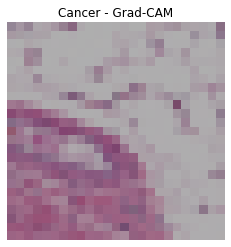

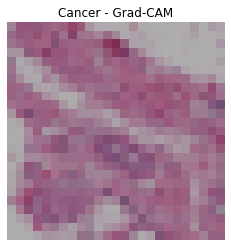

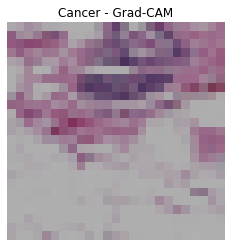

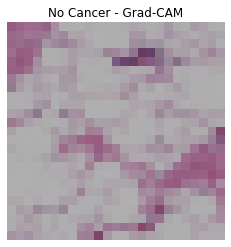

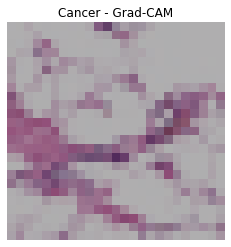

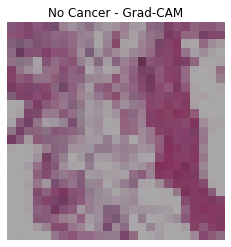

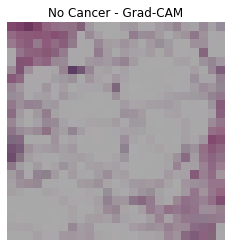

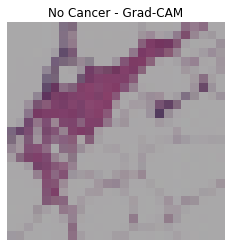

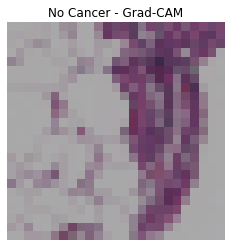

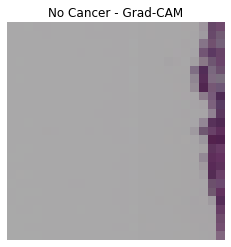

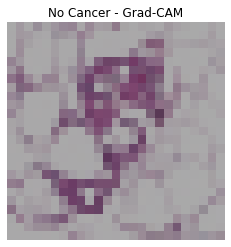

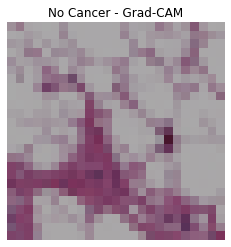

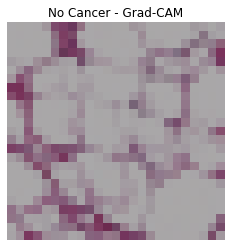

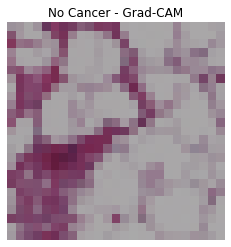

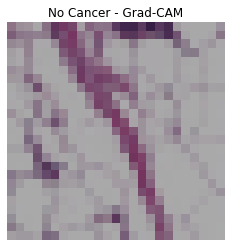

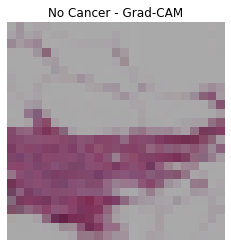

In [211]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

class GradCAM:
    def __init__(self, img_file_path):
        self.img_file_path = img_file_path

    def prediction_function(self):
        predict_generation = data_generation.flow_from_directory(
            self.img_file_path,
            target_size=(25, 25),
            batch_size=10,
            class_mode='categorical')

        prediction = loaded_model.predict_generator(predict_generation)
        return prediction, predict_generation.filenames

# Assuming you have defined `loaded_model` and `data_generation` variables

# Use Grad-CAM to mark areas of interest and display the image
prediction = GradCAM("histopathology_image_processing/model_tst/trainig")
predictions, filenames = prediction.prediction_function()

# Counters for cancer and no cancer images
cancer_counter = 0
no_cancer_counter = 0

# Based on predictions, use Grad-CAM to mark regions of interest and display images with cancer
for i, filename in enumerate(filenames):
    if predictions[i][0] >= 0.5 and cancer_counter < 20:
        path = os.path.join(prediction.img_file_path, filename)
        heatmap = visualize_grad_cam(loaded_model, path, layer_name='conv2d_6')
        
        img = cv2.imread(path)
        img = cv2.resize(img, (heatmap.shape[1], heatmap.shape[0]))
        
        overlay = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
        
        plt.figure()
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.title("Cancer - Grad-CAM")
        plt.axis('off')
        plt.show()
        
        cancer_counter += 1

    if predictions[i][0] < 0.5 and no_cancer_counter < 20:
        path = os.path.join(prediction.img_file_path, filename)
        heatmap = visualize_grad_cam(loaded_model, path, layer_name='conv2d_6')
        
        img = cv2.imread(path)
        img = cv2.resize(img, (heatmap.shape[1], heatmap.shape[0]))
        
        overlay = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
        
        plt.figure()
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.title("No Cancer - Grad-CAM")
        plt.axis('off')
        plt.show()
        
        no_cancer_counter += 1

    # Break the loop if the desired number of images is reached for both cancer and no cancer
    if cancer_counter >= 20 and no_cancer_counter >= 20:
        break


Found 18000 images belonging to 2 classes.


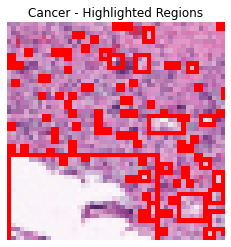

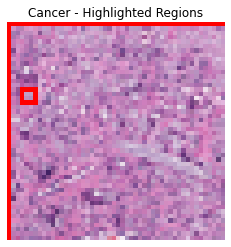

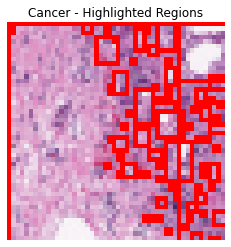

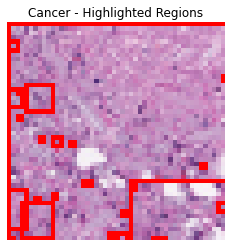

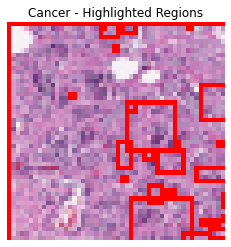

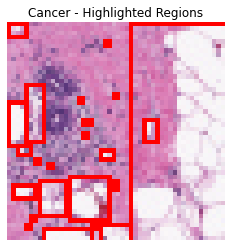

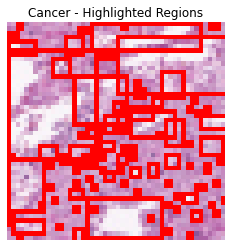

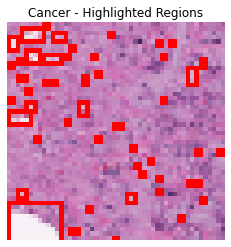

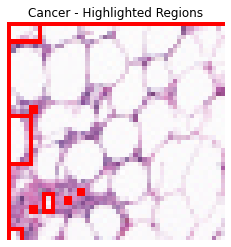

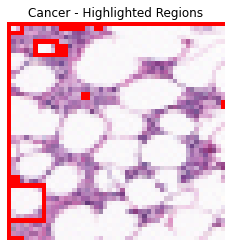

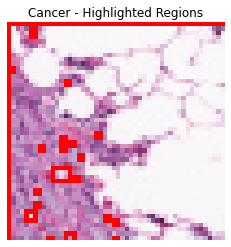

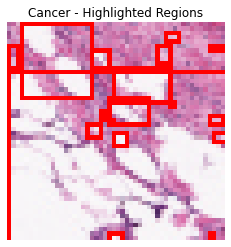

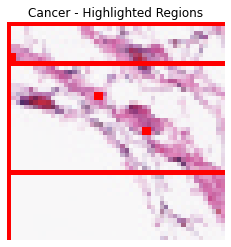

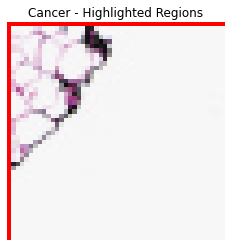

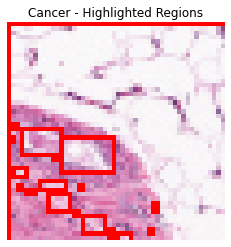

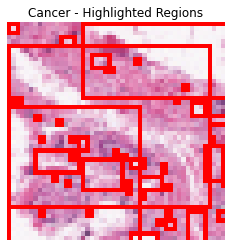

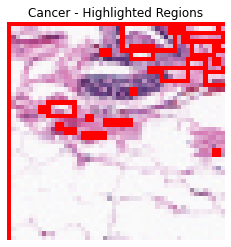

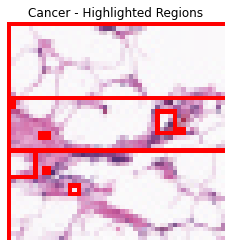

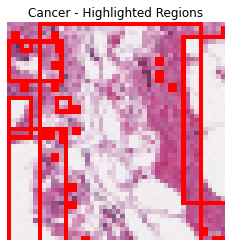

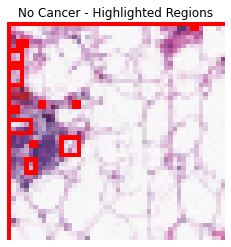

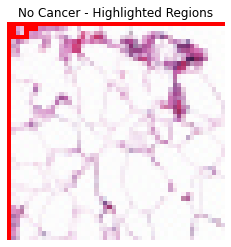

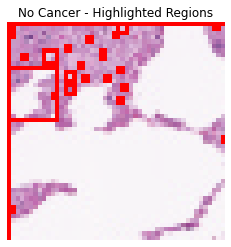

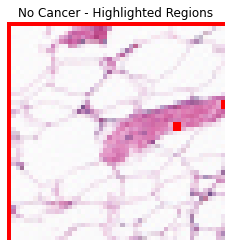

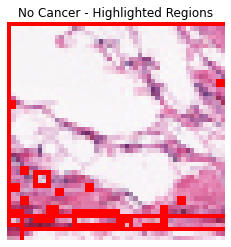

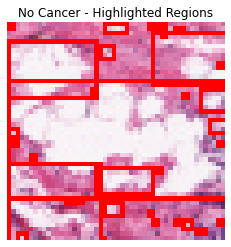

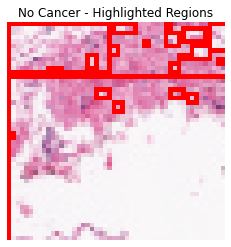

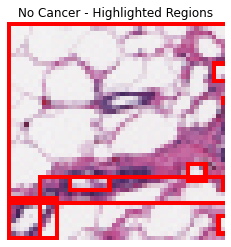

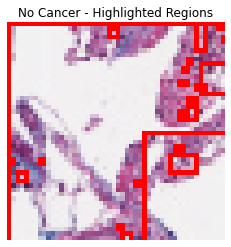

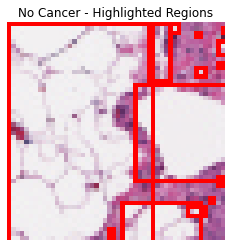

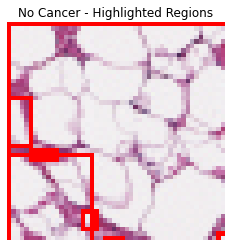

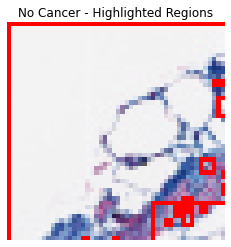

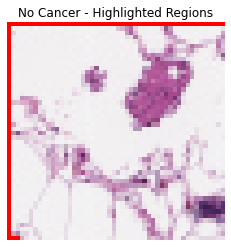

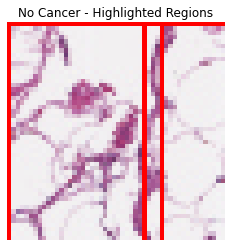

In [212]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

class RegionHighlighter:
    def __init__(self, img_file_path):
        self.img_file_path = img_file_path
    
    def prediction_function(self):
        predict_generation = data_generation.flow_from_directory(
            self.img_file_path,
            target_size=(25, 25),
            batch_size=10,
            class_mode='categorical'
        )

        prediction = loaded_model.predict_generator(predict_generation)
        return prediction, predict_generation.filenames

# Assuming you have defined `loaded_model` and `data_generation` variables

# Use RegionHighlighter to mark regions of interest and display the image
highlighter = RegionHighlighter("histopathology_image_processing/model_tst/trainig")
predictions, filenames = highlighter.prediction_function()

# Initialize counters
cancer_counter = 0
no_cancer_counter = 0

# Based on predictions, mark regions of interest and display images with cancer
for i, filename in enumerate(filenames):
    if cancer_counter >= 20 and no_cancer_counter >= 20:
        break  # Stop the loop after getting the required number of images
    
    if predictions[i][0] >= 0.5 and cancer_counter < 20:
        path = os.path.join(highlighter.img_file_path, filename)
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 1)  # Draw a green bounding box around the contour
        
        plt.figure()
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Cancer - Highlighted Regions")
        plt.axis('off')
        plt.show()
        
        cancer_counter += 1

# Based on predictions, mark regions of interest and display images without cancer
for i, filename in enumerate(filenames):
    if cancer_counter >= 20 and no_cancer_counter >= 20:
        break  # Stop the loop after getting the required number of images
    
    if predictions[i][0] < 0.5 and no_cancer_counter < 20:
        path = os.path.join(highlighter.img_file_path, filename)
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 1)  # Draw a green bounding box around the contour
        
        plt.figure()
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("No Cancer - Highlighted Regions")
        plt.axis('off')
        plt.show()
        
        no_cancer_counter += 1
